In [1]:
import pandas as pd
import numpy as np

In [2]:
grain=pd.read_csv('seeds_dataset.csv',header=None,names=['Area','Perimeter','Compactness','Lenth_K','Width_K','Asymmety_Coef','Length_K_Groove','Class'])

In [3]:
# class is abba , massa, canadian wheat 
# data is created from images of seeds convert into binary 
# and number how many coverage the image
# area calculate by this 
# area of the seeds
# total perimeter of seeds
# compactness of seed 4pi*A/p^2
# length of kernal means length of upper layer of seed 
# width of kernal
# asymmetry of coeficient is skewness of seeds 
# length of groove means , length of cutted area in two parts 
# 

In [4]:
grain.head()

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [5]:
grain.shape

(210, 8)

In [6]:
print(grain.Class.unique())

[1.    5.    2.27  4.607   nan 2.    5.439 3.    5.088 5.163 4.745]


In [7]:

grain.Class.value_counts() # making equal class using analysing

2.000    68
1.000    66
3.000    65
4.607     1
5.163     1
5.439     1
2.270     1
5.088     1
4.745     1
5.000     1
Name: Class, dtype: int64

In [8]:
grain.iloc[170,7]

5.162999999999999

In [9]:
grain['Class']=grain['Class'].replace(2.270,3)

In [10]:
grain['Class']=grain['Class'].replace(5.439,2)

In [11]:
grain['Class']=grain['Class'].replace(5.088,3)
grain['Class']=grain['Class'].replace(5.163,3)

In [12]:
grain['Class']=grain['Class'].replace(4.607,1)
grain['Class']=grain['Class'].replace(5.162999999999999,1)

In [13]:
grain['Class']=grain['Class'].replace(to_replace=[5,4.745],value=[1,1],)

In [14]:
grain.isnull().sum()

Area               0
Perimeter          0
Compactness        3
Lenth_K            0
Width_K            1
Asymmety_Coef      0
Length_K_Groove    4
Class              4
dtype: int64

In [15]:
print(4*3.14*(11.24/169)) # calculated manually
print(4*3.14*(11.02/169))
print(4*3.14*(16.12/(15*15)))

0.8353514792899408
0.8190011834319526
0.8998542222222224


In [16]:
grain.iloc[169,2]=0.8353
grain.iloc[170,2]=0.8190
grain.iloc[35,2]=0.8999

In [17]:
grain['Width_K']=grain['Width_K'].fillna(grain['Width_K'].mean())

In [18]:
grain.groupby('Class')['Length_K_Groove'].mean()

Class
1.0    5.111791
2.0    6.026515
3.0    5.076985
Name: Length_K_Groove, dtype: float64

In [19]:
grain.iloc[7,6]= 5.1117
grain.iloc[60,6]= 5.1117
grain.iloc[135,6]=6.0290
grain.iloc[201,6]= 5.1117

In [20]:
grain.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Lenth_K            0
Width_K            0
Asymmety_Coef      0
Length_K_Groove    0
Class              4
dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


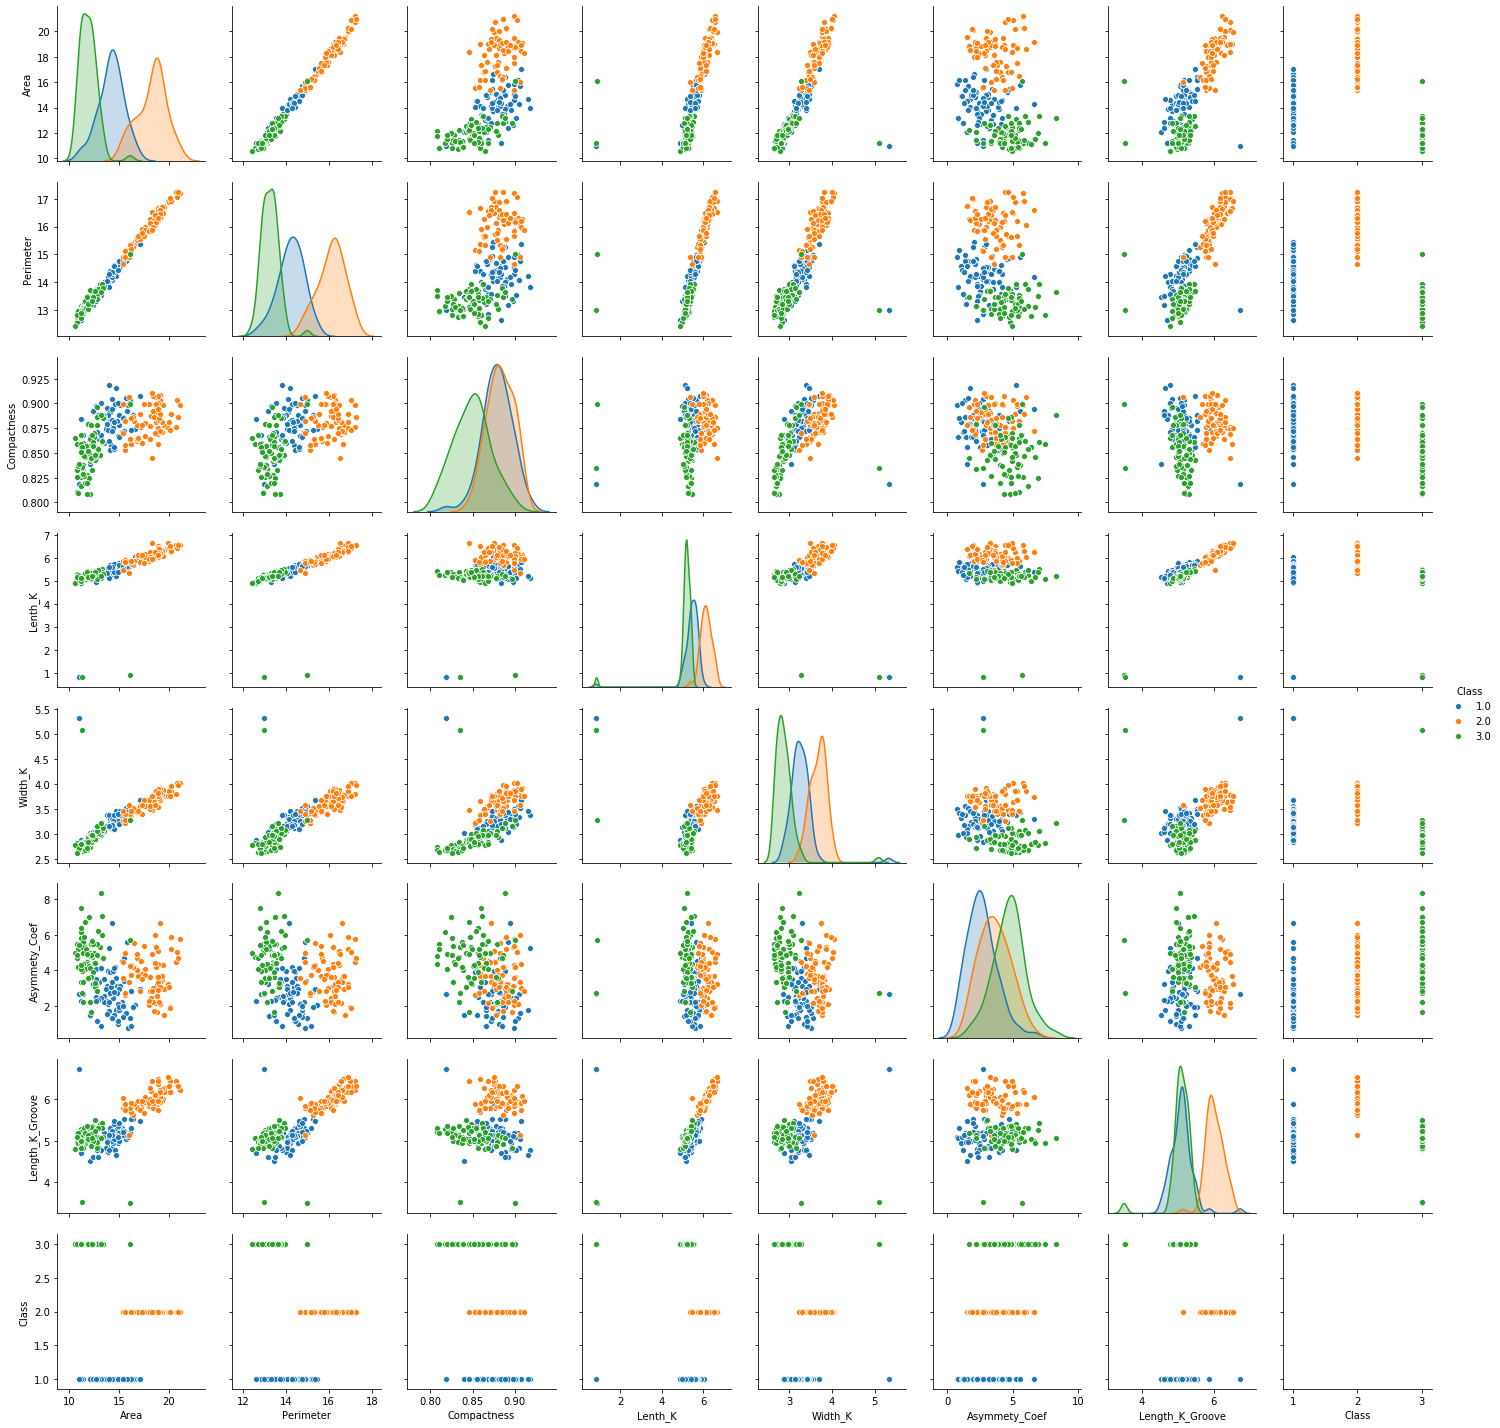

In [22]:
sns.pairplot(grain,hue='Class')

In [23]:
grain.Class.value_counts()

1.0    70
2.0    69
3.0    67
Name: Class, dtype: int64

In [24]:
grain.describe()

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,206.000000
mean,14.847524,14.559286,0.870996,5.563918,3.281440,3.693530,5.406262,1.985437
std,2.909699,1.305959,0.023632,0.719594,0.418901,1.495112,0.530146,0.817361
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000,1.000000
25%,12.270000,13.450000,0.856900,5.244750,2.957000,2.600250,5.045250,1.000000
50%,14.355000,14.320000,0.873450,5.518000,3.251500,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.565250,4.768750,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000,3.000000


In [25]:
grain.corr()

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove,Class
Area,1.000000,0.994341,0.608335,0.645418,0.801248,-0.205876,0.784721,-0.312580
Perimeter,0.994341,1.000000,0.529298,0.657490,0.782973,-0.196360,0.810788,-0.293164
Compactness,0.608335,0.529298,1.000000,0.296123,0.577030,-0.287470,0.189241,-0.511419
Lenth_K,0.645418,0.657490,0.296123,1.000000,0.176190,-0.102325,0.668146,-0.175221
Width_K,0.801248,0.782973,0.577030,0.176190,1.000000,-0.248286,0.600514,-0.360872
Asymmety_Coef,-0.205876,-0.196360,-0.287470,-0.102325,-0.248286,1.000000,-0.033178,0.576864
Length_K_Groove,0.784721,0.810788,0.189241,0.668146,0.600514,-0.033178,1.000000,-0.016262
Class,-0.312580,-0.293164,-0.511419,-0.175221,-0.360872,0.576864,-0.016262,1.000000


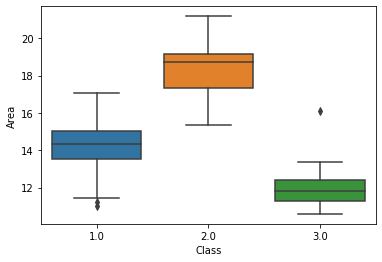

In [26]:
sns.boxplot(grain.Class,grain.Area) # area is good feature for inference 

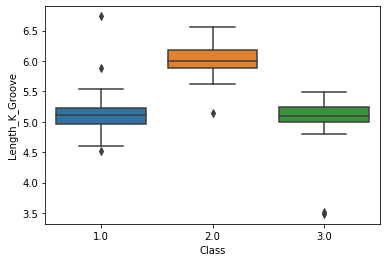

In [27]:
sns.boxplot(grain.Class,grain.Length_K_Groove) # Length_K_Groove is good feature for inference 

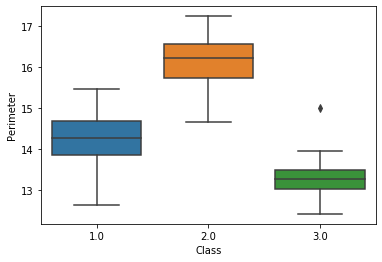

In [28]:
sns.boxplot(grain.Class,grain.Perimeter) # Perimeter is good feature for inference 

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
grain.head()

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [30]:
X=grain.drop('Class',axis=1)

In [84]:
grain['Class'].value_counts() # already given class 

1.0    70
2.0    69
3.0    67
Name: Class, dtype: int64

In [31]:
scaledata=sc.fit_transform(X)

In [32]:
X_std=pd.DataFrame(scaledata,columns=X.columns)

In [33]:
X_std.head()

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove
0,0.142098,0.215462,0.000182,0.277320,0.073127,-0.987249,-0.352181
1,0.011188,0.008224,0.428588,-0.013816,0.123378,-1.793794,-0.851348
2,-0.192067,-0.360201,1.442342,-0.380173,0.132949,-0.666777,-1.099040
3,-0.347091,-0.475333,1.039386,-0.334204,0.233451,-0.961772,-1.136856
4,0.445257,0.330595,1.374476,0.131056,0.671352,-1.567854,-0.437267


In [196]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3)
xpred=ag.fit_predict(X_std)
X_std['class']=xpred

In [197]:
X_std['class'].value_counts() # 3 cluster  eucledian with ward 

1    76
2    75
0    59
Name: class, dtype: int64

In [198]:
from scipy.spatial.distance import pdist

In [199]:
pdist(X_std)

array([1.10931671, 1.90243432, 1.6770443 , ..., 3.68828888, 2.11518247,
       1.58151297])

In [200]:
c0=np.mean(X_std.iloc[:,:-1],axis=0)# mean of by column 
c0# centroid of each column

Area              -5.392512e-17
Perimeter          9.146123e-17
Compactness        8.244860e-15
Lenth_K           -7.702833e-16
Width_K           -4.081391e-16
Asymmety_Coef     -1.015061e-16
Length_K_Groove    2.249523e-15
dtype: float64

In [201]:
np.sqrt(np.sum(np.square(X_std.iloc[0]-X_std.iloc[2])))

1.9024343160130366

In [202]:
grp=X_std.groupby(['class'])

In [203]:
df0=grp.get_group(0)
df1=grp.get_group(1)
df2=grp.get_group(2)

In [204]:
df0.shape,df1.shape,df2.shape

((59, 8), (76, 8), (75, 8))

In [205]:
c0=df0.mean()
c0=c0[:-1]
c0  # centroid of first cluster 

Area              -0.192475
Perimeter         -0.228416
Compactness        0.449149
Lenth_K           -0.432096
Width_K            0.112648
Asymmety_Coef     -0.659582
Length_K_Groove   -0.690843
dtype: float64

In [206]:
c1=df1.mean()
c1=c1[:-1] # centroid of second cluster
c1

Area               1.140466
Perimeter          1.152480
Compactness        0.509068
Lenth_K            0.789685
Width_K            0.899653
Asymmety_Coef     -0.056937
Length_K_Groove    1.107178
dtype: float64

In [207]:
c2=df2.mean()
c2=c2[:-1]  # centroid of third cluster
c2

Area              -1.004258
Perimeter         -0.988159
Compactness       -0.869186
Lenth_K           -0.460298
Width_K           -1.000265
Asymmety_Coef      0.576568
Length_K_Groove   -0.578478
dtype: float64

In [208]:
# as we know that in agglomerative there is no funtion to calculate the inertia 
# so we calculate manually 
# sum((every record - centroid)**2)

In [209]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
    I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [210]:
total_inertia=I0+I1+I2
total_inertia

618.939864347497

In [170]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3,linkage='single')
x_pred=ag.fit_predict(X_std)
X_std['class']=x_pred

X_std['class'].value_counts() # 3 cluster  eucledian with single 
c0=np.mean(X_std.iloc[:,:-1],axis=0)# mean of by column # centroid of each column
np.sqrt(np.sum(np.square(X_std.iloc[0]-X_std.iloc[2])))

grp=X_std.groupby(['class'])

df0=grp.get_group(0)
df1=grp.get_group(1)
df2=grp.get_group(2)

df0.shape,df1.shape,df2.shape

c0=df0.mean()
c0=c0[:-1]  # centroid of first cluster 

c1=df1.mean()
c1=c1[:-1] # centroid of second cluster

c2=df2.mean()
c2=c2[:-1]  # centroid of third cluster

# as we know that in agglomerative there is no funtion to calculate the inertia 
# so we calculate manually 
# sum((every record - centroid)**2)

I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
    I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

total_inertia=I0+I1+I2
total_inertia

1263.324641435891

In [173]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3,linkage='average',affinity='euclidean')
xpred=ag.fit_predict(X_std)# ward is only work with eucledean distance
X_std['class']=xpred

X_std['class'].value_counts() # 3 cluster  eucledian with single 
c0=np.mean(X_std.iloc[:,:-1],axis=0)# mean of by column # centroid of each column
np.sqrt(np.sum(np.square(X_std.iloc[0]-X_std.iloc[2])))

grp=X_std.groupby(['class'])

df0=grp.get_group(0)
df1=grp.get_group(1)
df2=grp.get_group(2)

df0.shape,df1.shape,df2.shape

c0=df0.mean()
c0=c0[:-1]  # centroid of first cluster 

c1=df1.mean()
c1=c1[:-1] # centroid of second cluster

c2=df2.mean()
c2=c2[:-1]  # centroid of third cluster

# as we know that in agglomerative there is no funtion to calculate the inertia 
# so we calculate manually 
# sum((every record - centroid)**2)

I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
    I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

total_inertia=I0+I1+I2
total_inertia

1263.324641435891

In [174]:
from scipy.cluster.hierarchy import dendrogram, linkage

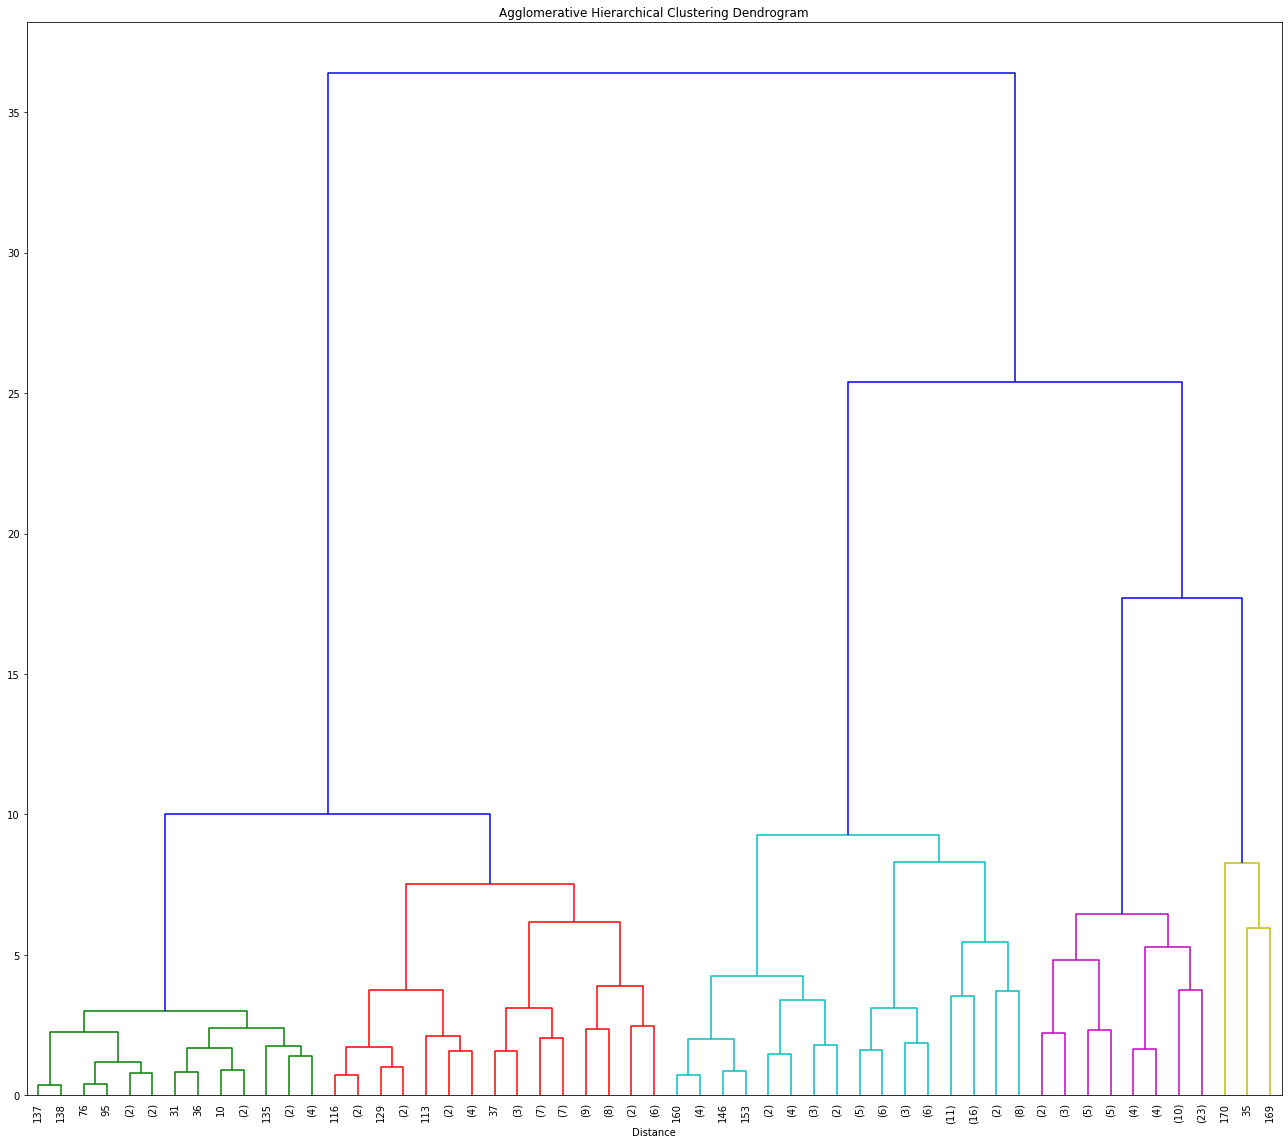

In [223]:
plt.figure(figsize=(18,16))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
z=linkage(X_std,'ward')
dendrogram(z,leaf_rotation=90.0,color_threshold=10,leaf_font_size=10,truncate_mode='level',p=5)
plt.tight_layout()
# at what level you investigate the cluster the 1,,2,3,4 ... change the color_threshold
#  if you don't give the truncate mode it give the complete tree structure
# like it show from one record like a,b,c ,d,e
# but when you give truncate it will start some level
# like (a,b,c),(d,e,f)
# p=5 no of level of dendrogram
# on x axis some numbers are showing in braces that tell us number of record in the braces
# with out braces are index
# like (7) seven records if i want to see seven records seperately  I have to go one more level
# similar to max_depth
# who is green and who is red and pink tell me which color is which group
# atleast every cluster one group is non braces so check the index and go with from which class
# like index 83  is 

In [218]:
X_std.iloc[135:136] # green is class 1 # check manually which dendrogram belong to which class

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove,class
135,0.183438,0.077303,1.187843,-0.121076,0.43924,-0.062706,1.177461,1


In [212]:
X_std.iloc[37:38] #  red is class 1

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove,class
37,0.769087,0.62994,1.56535,0.373436,0.960893,-0.494472,0.146985,1


In [213]:
X_std.iloc[160:161] # blue is class 2

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove,class
160,-0.79494,-0.682572,-1.208688,-0.157294,-0.962999,-0.409997,0.16022,2


In [214]:
X_std.iloc[170:171] # blue is class 0

,Area,Perimeter,Compactness,Lenth_K,Width_K,Asymmety_Coef,Length_K_Groove,class
170,-1.318579,-1.196831,-2.205475,-6.609781,4.890036,-0.665436,2.512352,0
